In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", "Charlie", "Diana", "Eva"],
    "Age": [25, 30, 35, 28, 45],
    "Gender": ["Female", "Male", "Male", "Female", "Female"],
    "Salary": [50000, 60000, 55000, 62000, 70000],
    "Department": ["HR", "IT", "Finance", "IT", "HR"],
    "Joining_Year": [2018, 2016, 2015, 2019, 2010]
}

df = pd.DataFrame(data)
print("First 3 Rows of DataFrame:\n", df.head(3))


First 3 Rows of DataFrame:
    ID     Name  Age  Gender  Salary Department  Joining_Year
0   1    Alice   25  Female   50000         HR          2018
1   2      Bob   30    Male   60000         IT          2016
2   3  Charlie   35    Male   55000    Finance          2015


In [ ]:
print("Missing Values:\n", df.isnull().sum())


Missing Values:
 ID              0
Name            0
Age             0
Gender          0
Salary          0
Department      0
Joining_Year    0
dtype: int64


In [ ]:
print("Average Age by Department:\n", df.groupby("Department")["Age"].mean())


Average Age by Department:
 Department
Finance    35.0
HR         35.0
IT         29.0
Name: Age, dtype: float64


In [ ]:
print("Employees Joined Before 2015:\n", df[df["Joining_Year"] < 2015].shape[0])


Employees Joined Before 2015:
 1


In [ ]:
df["Experience"] = 2025 - df["Joining_Year"]
print("DataFrame with Experience:\n", df)


DataFrame with Experience:
    ID     Name  Age  Gender  Salary Department  Joining_Year  Experience
0   1    Alice   25  Female   50000         HR          2018           7
1   2      Bob   30    Male   60000         IT          2016           9
2   3  Charlie   35    Male   55000    Finance          2015          10
3   4    Diana   28  Female   62000         IT          2019           6
4   5      Eva   45  Female   70000         HR          2010          15


In [ ]:
high_salary_df = df[df["Salary"] > 55000]
print("Employees with Salary > 55,000:\n", high_salary_df)


Employees with Salary > 55,000:
    ID   Name  Age  Gender  Salary Department  Joining_Year  Experience
1   2    Bob   30    Male   60000         IT          2016           9
3   4  Diana   28  Female   62000         IT          2019           6
4   5    Eva   45  Female   70000         HR          2010          15


In [ ]:
print("Gender Count:\n", df["Gender"].value_counts())


Gender Count:
 Gender
Female    3
Male      2
Name: count, dtype: int64


In [ ]:
highest_paid = df.loc[df["Salary"].idxmax()]
print("Highest Paid Employee:\n", highest_paid)


Highest Paid Employee:
 ID                   5
Name               Eva
Age                 45
Gender          Female
Salary           70000
Department          HR
Joining_Year      2010
Experience          15
Name: 4, dtype: object


In [ ]:
df_sorted = df.sort_values(by="Age", ascending=False)
print("Sorted DataFrame by Age:\n", df_sorted)


Sorted DataFrame by Age:
    ID     Name  Age  Gender  Salary Department  Joining_Year  Experience
4   5      Eva   45  Female   70000         HR          2010          15
2   3  Charlie   35    Male   55000    Finance          2015          10
1   2      Bob   30    Male   60000         IT          2016           9
3   4    Diana   28  Female   62000         IT          2019           6
0   1    Alice   25  Female   50000         HR          2018           7


In [ ]:
summary_table = df.groupby("Department").agg({"Salary": "mean", "Age": "mean"})
print("Summary Table:\n", summary_table)


Summary Table:
              Salary   Age
Department               
Finance     55000.0  35.0
HR          60000.0  35.0
IT          61000.0  29.0


In [ ]:
highest_salary_dept = summary_table["Salary"].idxmax()
print("Department with Highest Average Salary:", highest_salary_dept)


Department with Highest Average Salary: IT


In [ ]:
avg_salary_by_gender = df.groupby("Gender")["Salary"].mean()
salary_diff = avg_salary_by_gender.diff().iloc[-1]
print("Salary Difference Between Genders:\n", salary_diff)


Salary Difference Between Genders:
 -3166.6666666666642


In [ ]:
dept_percentage = df["Department"].value_counts(normalize=True) * 100
print("Percentage of Employees in Each Department:\n", dept_percentage)


Percentage of Employees in Each Department:
 Department
HR         40.0
IT         40.0
Finance    20.0
Name: proportion, dtype: float64


In [ ]:
def salary_category(salary):
    if salary < 55000:
        return "Low"
    elif 55000 <= salary <= 65000:
        return "Medium"
    else:
        return "High"

df["Salary_Category"] = df["Salary"].apply(salary_category)
print("DataFrame with Salary Categories:\n", df)


DataFrame with Salary Categories:
    ID     Name  Age  Gender  Salary Department  Joining_Year  Experience  \
0   1    Alice   25  Female   50000         HR          2018           7   
1   2      Bob   30    Male   60000         IT          2016           9   
2   3  Charlie   35    Male   55000    Finance          2015          10   
3   4    Diana   28  Female   62000         IT          2019           6   
4   5      Eva   45  Female   70000         HR          2010          15   

  Salary_Category  
0             Low  
1          Medium  
2          Medium  
3          Medium  
4            High  


In [ ]:
youngest_employee = df.loc[df["Age"].idxmin(), ["Name", "Department", "Salary"]]
print("Youngest Employee:\n", youngest_employee)


Youngest Employee:
 Name          Alice
Department       HR
Salary        50000
Name: 0, dtype: object


In [ ]:
total_experience = df.groupby("Department")["Experience"].sum()
print("Total Years of Experience in Each Department:\n", total_experience)


Total Years of Experience in Each Department:
 Department
Finance    10
HR         22
IT         15
Name: Experience, dtype: int64


In [ ]:
median_salary = df[df["Joining_Year"] > 2015]["Salary"].median()
print("Median Salary for Employees Joined After 2015:", median_salary)


Median Salary for Employees Joined After 2015: 60000.0


In [ ]:
df["Salary"] = df.apply(lambda row: df[df["Department"] == row["Department"]]["Salary"].mean()
                        if row["Salary"] < 55000 else row["Salary"], axis=1)
print("Updated Salary DataFrame:\n", df)


Updated Salary DataFrame:
    ID     Name  Age  Gender   Salary Department  Joining_Year  Experience  \
0   1    Alice   25  Female  60000.0         HR          2018           7   
1   2      Bob   30    Male  60000.0         IT          2016           9   
2   3  Charlie   35    Male  55000.0    Finance          2015          10   
3   4    Diana   28  Female  62000.0         IT          2019           6   
4   5      Eva   45  Female  70000.0         HR          2010          15   

  Salary_Category  
0             Low  
1          Medium  
2          Medium  
3          Medium  
4            High  


In [ ]:
pivot_table = df.pivot_table(index="Department", columns="Gender", aggfunc="size", fill_value=0)
print("Pivot Table:\n", pivot_table)


Pivot Table:
 Gender      Female  Male
Department              
Finance          0     1
HR               2     0
IT               1     1


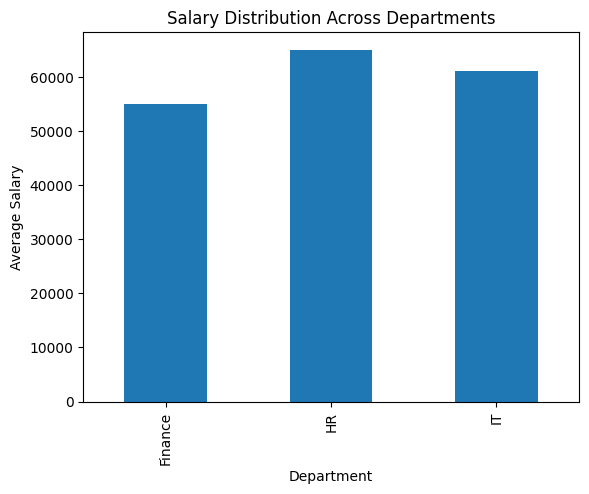

In [ ]:
import matplotlib.pyplot as plt

df.groupby("Department")["Salary"].mean().plot(kind="bar", title="Salary Distribution Across Departments")
plt.xlabel("Department")
plt.ylabel("Average Salary")
plt.show()


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import MinMaxScaler

diabetes = load_diabetes()
bmi_feature = diabetes.data[:, 2].reshape(-1, 1)

scaler = MinMaxScaler()
normalized_bmi = scaler.fit_transform(bmi_feature)

print("Original BMI values:", bmi_feature[:5].flatten())
print("Normalized BMI values:", normalized_bmi[:5].flatten())


Original BMI values: [ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
Normalized BMI values: [0.58264463 0.14876033 0.51652893 0.30165289 0.20661157]


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
petal_length = iris.data[:, 2].reshape(-1, 1)

scaler = StandardScaler()
standardized_petal_length = scaler.fit_transform(petal_length)

print("Mean Before Standardization:", petal_length.mean())
print("Standard Deviation Before Standardization:", petal_length.std())
print("Mean After Standardization:", standardized_petal_length.mean())
print("Standard Deviation After Standardization:", standardized_petal_length.std())


Mean Before Standardization: 3.7580000000000005
Standard Deviation Before Standardization: 1.759404065775303
Mean After Standardization: -4.263256414560601e-16
Standard Deviation After Standardization: 1.0


In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
features = wine.data[:, :2]  # Extract Alcohol & Malic Acid

# Min-Max Normalization
minmax_scaler = MinMaxScaler()
normalized_features = minmax_scaler.fit_transform(features)

# Z-score Standardization
std_scaler = StandardScaler()
standardized_features = std_scaler.fit_transform(features)

print("Summary Before Transformation:\n", pd.DataFrame(features).describe())
print("Summary After Min-Max Normalization:\n", pd.DataFrame(normalized_features).describe())
print("Summary After Standardization:\n", pd.DataFrame(standardized_features).describe())


Summary Before Transformation:
                 0           1
count  178.000000  178.000000
mean    13.000618    2.336348
std      0.811827    1.117146
min     11.030000    0.740000
25%     12.362500    1.602500
50%     13.050000    1.865000
75%     13.677500    3.082500
max     14.830000    5.800000
Summary After Min-Max Normalization:
                 0           1
count  178.000000  178.000000
mean     0.518584    0.315484
std      0.213639    0.220780
min      0.000000    0.000000
25%      0.350658    0.170455
50%      0.531579    0.222332
75%      0.696711    0.462945
max      1.000000    1.000000
Summary After Standardization:
                   0             1
count  1.780000e+02  1.780000e+02
mean   7.943708e-15  3.592632e-16
std    1.002821e+00  1.002821e+00
min   -2.434235e+00 -1.432983e+00
25%   -7.882448e-01 -6.587486e-01
50%    6.099988e-02 -4.231120e-01
75%    8.361286e-01  6.697929e-01
max    2.259772e+00  3.109192e+00


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load dataset
housing = fetch_california_housing()
data = housing.data  # Features
feature_names = housing.feature_names

# Select two continuous features: MedInc (Median Income) and AveRooms (Average Rooms)
feature1, feature2 = data[:, 0], data[:, 3]  # MedInc, AveRooms

# Select two random data points
point1, point2 = np.array([feature1[0], feature2[0]]), np.array([feature1[1], feature2[1]])

# Compute Euclidean distance before normalization
dist_before = np.linalg.norm(point1 - point2)

# Apply Min-Max Normalization
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(data[:, [0, 3]])

# Compute Euclidean distance after normalization
normalized_point1, normalized_point2 = normalized_features[0], normalized_features[1]
dist_after = np.linalg.norm(normalized_point1 - normalized_point2)

print("Euclidean Distance Before Normalization:", dist_before)
print("Euclidean Distance After Normalization:", dist_after)


Euclidean Distance Before Normalization: 0.05712323813635894
Euclidean Distance After Normalization: 0.002250288527657589


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create dataset with outliers
data = [
    [10, 50, 200, 5, 1000],
    [12, 55, 210, 6, 1100],
    [14, 60, 220, 7, 1200],
    [16, 65, 230, 8, 1300],
    [18, 70, 240, 9, 1400],
    [20, 75, 250, 10, 1500],
    [100, 500, 10000, 100, 50000]  # Outlier
]

df = pd.DataFrame(data, columns=["Feature1", "Feature2", "Feature3", "Feature4", "Feature5"])
print("Original DataFrame:\n", df)

# Apply Min-Max Normalization
minmax_scaler = MinMaxScaler()
normalized_data = minmax_scaler.fit_transform(df)

# Apply Z-score Standardization
std_scaler = StandardScaler()
standardized_data = std_scaler.fit_transform(df)

# Convert back to DataFrame
df_minmax = pd.DataFrame(normalized_data, columns=df.columns)
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

print("\nMin-Max Normalized Data:\n", df_minmax)
print("\nZ-score Standardized Data:\n", df_standardized)


Original DataFrame:
    Feature1  Feature2  Feature3  Feature4  Feature5
0        10        50       200         5      1000
1        12        55       210         6      1100
2        14        60       220         7      1200
3        16        65       230         8      1300
4        18        70       240         9      1400
5        20        75       250        10      1500
6       100       500     10000       100     50000

Min-Max Normalized Data:
    Feature1  Feature2  Feature3  Feature4  Feature5
0  0.000000  0.000000  0.000000  0.000000  0.000000
1  0.022222  0.011111  0.001020  0.010526  0.002041
2  0.044444  0.022222  0.002041  0.021053  0.004082
3  0.066667  0.033333  0.003061  0.031579  0.006122
4  0.088889  0.044444  0.004082  0.042105  0.008163
5  0.111111  0.055556  0.005102  0.052632  0.010204
6  1.000000  1.000000  1.000000  1.000000  1.000000

Z-score Standardized Data:
    Feature1  Feature2  Feature3  Feature4  Feature5
0 -0.573121 -0.489246 -0.415553 -0.4849

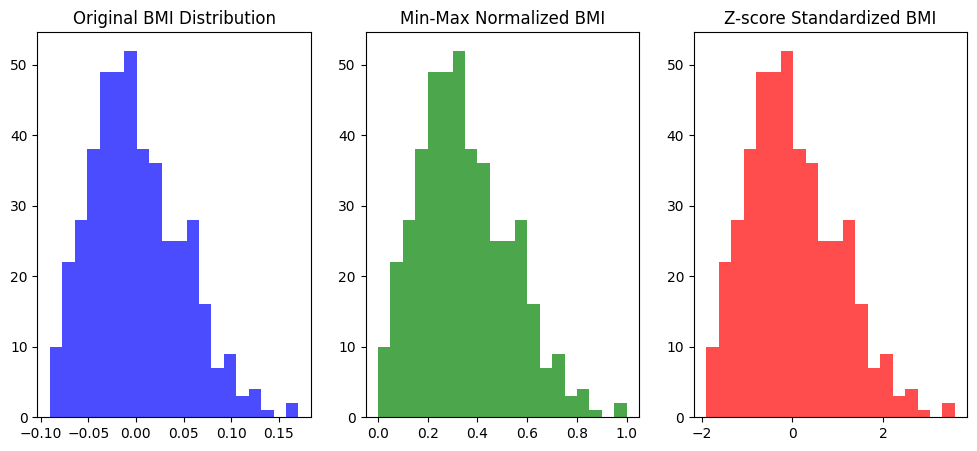

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Load dataset
diabetes = load_diabetes()
bmi_feature = diabetes.data[:, 2].reshape(-1, 1)

# Apply Min-Max Normalization
scaler_minmax = MinMaxScaler()
normalized_bmi = scaler_minmax.fit_transform(bmi_feature)

# Apply Z-score Standardization
scaler_standard = StandardScaler()
standardized_bmi = scaler_standard.fit_transform(bmi_feature)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.hist(bmi_feature, bins=20, color='blue', alpha=0.7)
plt.title("Original BMI Distribution")

plt.subplot(1, 3, 2)
plt.hist(normalized_bmi, bins=20, color='green', alpha=0.7)
plt.title("Min-Max Normalized BMI")

plt.subplot(1, 3, 3)
plt.hist(standardized_bmi, bins=20, color='red', alpha=0.7)
plt.title("Z-score Standardized BMI")

plt.show()


In [ ]:
import numpy as np

# Manually created dataset
data = np.array([[50, 200], [60, 220], [70, 250], [80, 280], [90, 300]])

# Custom Min-Max Normalization Function
def min_max_normalize(arr):
    return (arr - np.min(arr, axis=0)) / (np.max(arr, axis=0) - np.min(arr, axis=0))

# Custom Z-score Standardization Function
def z_score_standardize(arr):
    return (arr - np.mean(arr, axis=0)) / np.std(arr, axis=0)

# Apply Normalization & Standardization
normalized_data = min_max_normalize(data)
standardized_data = z_score_standardize(data)

print("Original Data:\n", data)
print("\nMin-Max Normalized Data:\n", normalized_data)
print("\nZ-score Standardized Data:\n", standardized_data)


Original Data:
 [[ 50 200]
 [ 60 220]
 [ 70 250]
 [ 80 280]
 [ 90 300]]

Min-Max Normalized Data:
 [[0.   0.  ]
 [0.25 0.2 ]
 [0.5  0.5 ]
 [0.75 0.8 ]
 [1.   1.  ]]

Z-score Standardized Data:
 [[-1.41421356 -1.35581536]
 [-0.70710678 -0.81348922]
 [ 0.          0.        ]
 [ 0.70710678  0.81348922]
 [ 1.41421356  1.35581536]]
